#***Walmart Customer Analysis***
### by Swapnil Rajput

##About Walmart

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

## Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men?

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv
df = pd.read_csv("walmart_data.csv")
df.head()

--2023-07-03 21:22:46--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.224.9.103, 13.224.9.24, 13.224.9.181, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.224.9.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘walmart_data.csv’

walmart_data.csv    100%[===================>]  21.96M  73.3MB/s    in 0.3s    

2023-07-03 21:22:47 (73.3 MB/s) - ‘walmart_data.csv’ saved [23027994/23027994]



,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.shape

(550068, 10)

Observations -
Given Data has 550068 rows and 10 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


Observations -
Given Data doesn't have any missing / null values.

In [ ]:
df.describe(include = "all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


Observations -
1. 25% of the purchases are below 5823.
2. 50% of the purchases are below 8047.
3. 75% of the purchases spending are below 12054.
4. Average purchase per transaction is 9263.97.

In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
df["Product_ID"].nunique()

3631

In [ ]:
df["Product_Category"].nunique()

20

In [39]:
cust_table = df.groupby(["User_ID", "Gender", "City_Category", "Marital_Status", "Age", "Occupation", "Stay_In_Current_City_Years"])["Purchase"].sum().reset_index()
cust_table.head()

,User_ID,Gender,City_Category,Marital_Status,Age,Occupation,Stay_In_Current_City_Years,Purchase
0,1000001,F,A,0,0-17,10,2,334093
1,1000002,M,C,0,55+,16,4+,810472
2,1000003,M,A,0,26-35,15,3,341635
3,1000004,M,B,1,46-50,7,2,206468
4,1000005,M,A,1,26-35,20,1,821001


In [ ]:
cust_table["User_ID"].count()

5891

Observations -
1. There are 3631 total number of products
2. Customers are from 3 cities.
3. Data is for 5891 customers who did 550068 number of transactions.

In [ ]:
print(f"Genderwise distribution in different categories".upper())

for i in cust_table.columns:
  if i !=  "User_ID" and i != "Purchase" and i != "Gender" :
    print("=" * len(f"For {i}"))
    print(f"For {i} :".upper())
    print("=" * len(f"For {i}"))
    print(f"{'-'*4}Total Count of Users{'-'*4}")
    print(pd.crosstab(index = cust_table["Gender"], columns = cust_table[i], values = cust_table["User_ID"], aggfunc = "count", margins = True))
    print("")
    print(f"{'-'*4}Total Purchase amount per user{'-'*4}")
    print(pd.crosstab(index = cust_table["Gender"], columns = cust_table[i], values = cust_table["Purchase"], aggfunc = "sum", margins = True))
    print("")
    print(f"{'-'*4}Total Purchase amount per user in percentage{'-'*4}")
    print((pd.crosstab(index = cust_table["Gender"], columns = cust_table[i], values = cust_table["Purchase"], aggfunc = "sum", margins = True, normalize = True)*100).round(2))
    print("*" * 150)

GENDERWISE DISTRIBUTION IN DIFFERENT CATEGORIES
FOR CITY_CATEGORY :
----Total Count of Users----
City_Category     A     B     C   All
Gender                               
F               295   503   868  1666
M               750  1204  2271  4225
All            1045  1707  3139  5891

----Total Purchase amount per user----
City_Category           A           B           C         All
Gender                                                       
F               306329915   493617008   386285719  1186232642
M              1010141746  1621916597  1277521757  3909580100
All            1316471661  2115533605  1663807476  5095812742

----Total Purchase amount per user in percentage----
City_Category      A      B      C     All
Gender                                    
F               6.01   9.69   7.58   23.28
M              19.82  31.83  25.07   76.72
All            25.83  41.52  32.65  100.00
**********************************************************************************************

Observations -
1. High number of customers are from city "C".
2. However total purchase amount is significantly high from city "B".
3. Single people have made more purchases.
4. Customers from agegroup "26-35" have made high number of transactions and also spend comparitively high than other age groups.
5. Customers who occupation is categorised below 8 has spend significantly more than rests.
6. Customers living in the city for 1 year have made huge spending as compared to rests. Most of the transcations are accounted for customers staying in the city for a year.

In [ ]:
cust_table.describe(include = "all")

,User_ID,Gender,City_Category,Marital_Status,Age,Occupation,Stay_In_Current_City_Years,Purchase
count,5.891000e+03,5891,5891,5891.000000,5891,5891.000000,5891,5.891000e+03
unique,NaN,2,3,NaN,7,NaN,5,NaN
top,NaN,M,C,NaN,26-35,NaN,1,NaN
freq,NaN,4225,3139,NaN,2053,NaN,2086,NaN
mean,1.003025e+06,NaN,NaN,0.419963,NaN,8.153285,NaN,8.650166e+05
std,1.743379e+03,NaN,NaN,0.493594,NaN,6.323140,NaN,9.436445e+05
min,1.000001e+06,NaN,NaN,0.000000,NaN,0.000000,NaN,4.668100e+04
25%,1.001518e+06,NaN,NaN,0.000000,NaN,3.000000,NaN,2.376780e+05
50%,1.003026e+06,NaN,NaN,0.000000,NaN,7.000000,NaN,5.212130e+05
75%,1.004532e+06,NaN,NaN,1.000000,NaN,14.000000,NaN,1.119250e+06


<Axes: xlabel='Gender', ylabel='Purchase'>

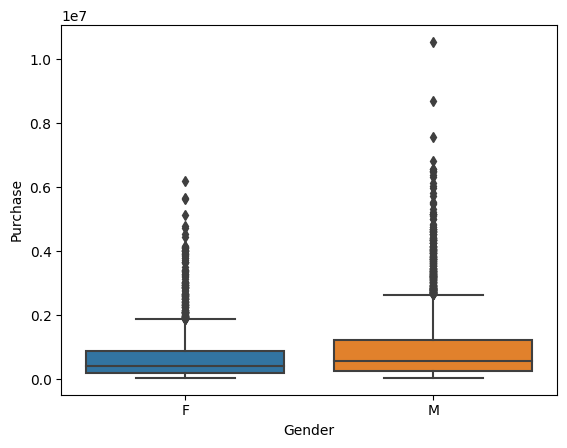

In [ ]:
sns.boxplot(data = cust_table, x = "Gender", y = "Purchase")

<Axes: xlabel='Gender', ylabel='Purchase'>

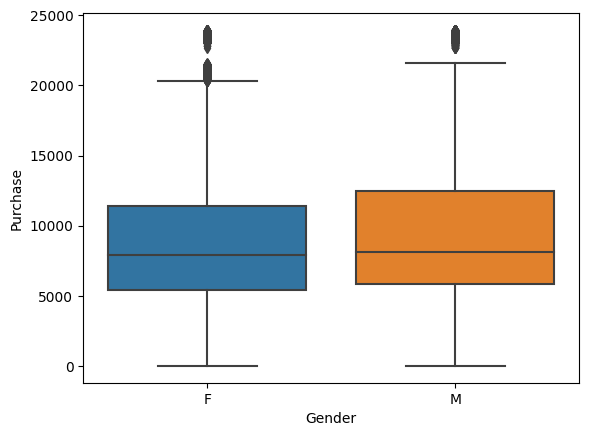

In [156]:
sns.boxplot(data = df, x = "Gender", y = "Purchase")

Observations -
1. Men have more number of ouliers in terms of total purchases.
2. Median purchase is pretty similar for Men and Women.

In [149]:
male_table = cust_table[cust_table["Gender"]=="M"]
male_table.head()

,User_ID,Gender,City_Category,Marital_Status,Age,Occupation,Stay_In_Current_City_Years,Purchase
1,1000002,M,C,0,55+,16,4+,810472
2,1000003,M,A,0,26-35,15,3,341635
3,1000004,M,B,1,46-50,7,2,206468
4,1000005,M,A,1,26-35,20,1,821001
6,1000007,M,B,1,36-45,1,1,234668


In [150]:
female_table = cust_table[cust_table["Gender"]=="F"]
female_table.head()

,User_ID,Gender,City_Category,Marital_Status,Age,Occupation,Stay_In_Current_City_Years,Purchase
0,1000001,F,A,0,0-17,10,2,334093
5,1000006,F,A,0,51-55,9,1,379930
9,1000010,F,B,1,36-45,1,4+,2169510
10,1000011,F,C,0,26-35,1,1,557023
15,1000016,F,C,1,36-45,0,0,150490


In [151]:
male_spending_per_transaction = round(male_table["Purchase"].sum() / df[df["Gender"] == "M"]["Product_ID"].count(), 2)
male_spending_per_transaction

9437.53

In [152]:
female_spending_per_transaction = round(female_table["Purchase"].sum() / df[df["Gender"] == "F"]["Product_ID"].count(), 2)
female_spending_per_transaction

8734.57

###Observation -
male_spending_per_transaction = 9437.53

female_spending_per_transaction = 8734.57

In [101]:
#Z Scores :
z_score_90 = norm.ppf(0.95)
z_score_95 = norm.ppf(0.975)
z_score_99 = norm.ppf(0.995)
z1 = norm.ppf(0.05)
z2 = norm.ppf(0.025)
z3 = norm.ppf(0.005)
print(f"z_score_90  : {z_score_90} \nz_score_95  : {z_score_95} \nz_score_99  : {z_score_99} \nz_score_05  : {z1} \nz_score_2.5 : {z2} \nz_score_01  : {z3}")

z_score_90  : 1.6448536269514722 
z_score_95  : 1.959963984540054 
z_score_99  : 2.5758293035489004 
z_score_05  : -1.6448536269514729 
z_score_2.5 : -1.9599639845400545 
z_score_01  : -2.575829303548901


## Bootstrapping of purchase sample means for CLT genderwise

#### For Sample size 100

In [119]:
male_sample_mean_100 = [np.mean(male_table['Purchase'].sample(100)) for i in range(500000)]
male_sample_mean_100[:5]

[1168054.19, 979518.58, 834278.93, 1043309.06, 986510.32]

In [120]:
female_sample_mean_100 = [np.mean(female_table['Purchase'].sample(100)) for i in range(500000)]
female_sample_mean_100[:5]

[700513.35, 625508.83, 702832.37, 807999.52, 628673.62]

In [ ]:
len(male_sample_mean_100)

500000

In [ ]:
len(female_sample_mean_100)

500000

<Axes: ylabel='Count'>

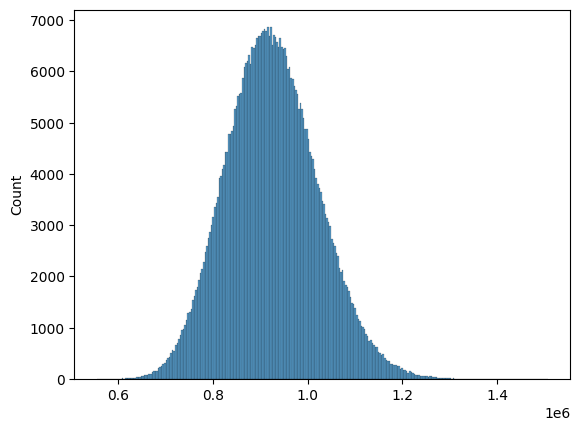

In [122]:
sns.histplot(male_sample_mean_100)

<Axes: ylabel='Count'>

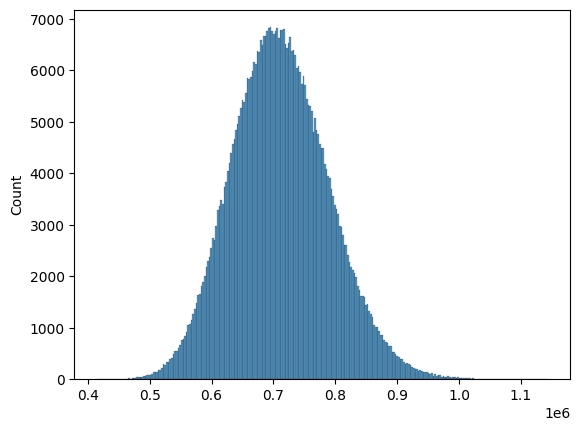

In [123]:
sns.histplot(female_sample_mean_100)

###Confidence Intervals

In [121]:
print(f"Male Population purchase Confidence interval :")
male_pop_mean = np.mean(male_sample_mean_100).round(2)
print(f"Population purchase mean for male : {male_pop_mean}")
pop_std_dev = np.std(male_sample_mean_100).round(2)
print(f"Population purchase standard deviation for male : {pop_std_dev}")
se = pop_std_dev/np.sqrt(100)
x1 =  (male_pop_mean + (z1 * se)).round(2)
x2 =  (male_pop_mean + (z_score_90 * se)).round(2)
print(f"The 90% confidence interval --> {x1} to {x2}")
x1 =  (male_pop_mean + (z2 * se)).round(2)
x2 =  (male_pop_mean + (z_score_95 * se)).round(2)
print(f"The 95% confidence interval --> {x1} to {x2}")
x1 =  (male_pop_mean + (z3 * se)).round(2)
x2 =  (male_pop_mean + (z_score_99 * se)).round(2)
print(f"The 99% confidence interval --> {x1} to {x2}")

Male Population purchase Confidence interval :
Population purchase mean for male : 925495.2
Population purchase standard deviation for male : 97306.06
The 90% confidence interval --> 909489.78 to 941500.62
The 95% confidence interval --> 906423.56 to 944566.84
The 99% confidence interval --> 900430.82 to 950559.58


In [124]:
print(f"Female Population purchase Confidence interval :")
female_pop_mean = np.mean(female_sample_mean_100).round(2)
print(f"Population purchase mean for female : {female_pop_mean}")
pop_std_dev = np.std(female_sample_mean_100).round(2)
print(f"Population purchase standard deviation for female : {pop_std_dev}")
se = pop_std_dev/np.sqrt(100)
x1 =  (female_pop_mean + (z1 * se)).round(2)
x2 =  (female_pop_mean + (z_score_90 * se)).round(2)
print(f"The 90% confidence interval --> {x1} to {x2}")
x1 =  (female_pop_mean + (z2 * se)).round(2)
x2 =  (female_pop_mean + (z_score_95 * se)).round(2)
print(f"The 95% confidence interval --> {x1} to {x2}")
x1 =  (female_pop_mean + (z3 * se)).round(2)
x2 =  (female_pop_mean + (z_score_99 * se)).round(2)
print(f"The 99% confidence interval --> {x1} to {x2}")

Female Population purchase Confidence interval :
Population purchase mean for female : 712104.48
Population purchase standard deviation for female : 78345.71
The 90% confidence interval --> 699217.76 to 724991.2
The 95% confidence interval --> 696749.0 to 727459.96
The 99% confidence interval --> 691923.96 to 732285.0


#### For Sample size 500

In [ ]:
male_sample_mean_500 = [np.mean(male_table['Purchase'].sample(500)) for i in range(500000)]
male_sample_mean_500[:5]

[915110.74, 855344.13, 878444.936, 944412.358, 949468.924]

In [ ]:
female_sample_mean_500 = [np.mean(female_table['Purchase'].sample(500)) for i in range(500000)]
female_sample_mean_500[:5]

[777540.456, 696670.372, 714867.332, 701261.224, 689925.628]

In [ ]:
len(male_sample_mean_500)

500000

In [ ]:
len(female_sample_mean_500)

500000

<Axes: ylabel='Count'>

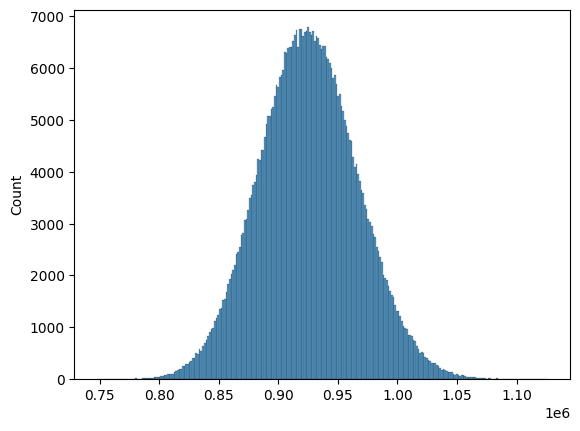

In [ ]:
sns.histplot(male_sample_mean_500)

<Axes: ylabel='Count'>

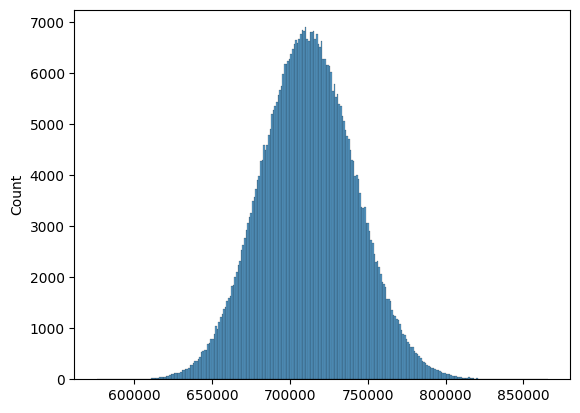

In [ ]:
sns.histplot(female_sample_mean_500)

###Confidence Intervals

In [ ]:
print(f"Male Population purchase Confidence interval :")
male_pop_mean = np.mean(male_sample_mean_500).round(2)
print(f"Population purchase mean for male : {male_pop_mean}")
pop_std_dev = np.std(male_sample_mean_500).round(2)
print(f"Population purchase standard deviation for male : {pop_std_dev}")
se = pop_std_dev/np.sqrt(500)
x1 =  (male_pop_mean + (z1 * se)).round(2)
x2 =  (male_pop_mean + (z_score_90 * se)).round(2)
print(f"The 90% confidence interval --> {x1} to {x2}")
x1 =  (male_pop_mean + (z2 * se)).round(2)
x2 =  (male_pop_mean + (z_score_95 * se)).round(2)
print(f"The 95% confidence interval --> {x1} to {x2}")
x1 =  (male_pop_mean + (z3 * se)).round(2)
x2 =  (male_pop_mean + (z_score_99 * se)).round(2)
print(f"The 99% confidence interval --> {x1} to {x2}")

Male Population purchase Confidence interval :
Population purchase mean for male : 925330.43
Population purchase standard deviation for male : 41364.53
The 90% confidence interval --> 922287.65 to 927701.14
The 95% confidence interval --> 921704.74 to 928373.21
The 99% confidence interval --> 920565.46 to 929633.89


In [ ]:
print(f"Female Population purchase Confidence interval :")
female_pop_mean = np.mean(female_sample_mean_500).round(2)
print(f"Population purchase mean for female : {female_pop_mean}")
pop_std_dev = np.std(female_sample_mean_500).round(2)
print(f"Population purchase standard deviation for female : {pop_std_dev}")
se = pop_std_dev/np.sqrt(500)
x1 =  (female_pop_mean + (z1 * se)).round(2)
x2 =  (female_pop_mean + (z_score_90 * se)).round(2)
print(f"The 90% confidence interval --> {x1} to {x2}")
x1 =  (female_pop_mean + (z2 * se)).round(2)
x2 =  (female_pop_mean + (z_score_95 * se)).round(2)
print(f"The 95% confidence interval --> {x1} to {x2}")
x1 =  (female_pop_mean + (z3 * se)).round(2)
x2 =  (female_pop_mean + (z_score_99 * se)).round(2)
print(f"The 99% confidence interval --> {x1} to {x2}")

Female Population purchase Confidence interval :
Population purchase mean for female : 712005.25
Population purchase standard deviation for female : 30144.36
The 90% confidence interval --> 709787.83 to 713732.91
The 95% confidence interval --> 709363.03 to 714222.67
The 99% confidence interval --> 708532.78 to 715141.39


#### For Sample size 1000

In [ ]:
male_sample_mean_1000 = [np.mean(male_table['Purchase'].sample(1000)) for i in range(500000)]
male_sample_mean_1000[:5]

[904906.439, 938486.562, 893278.681, 890844.288, 915175.534]

In [ ]:
female_sample_mean_1000 = [np.mean(female_table['Purchase'].sample(1000)) for i in range(500000)]
female_sample_mean_1000[:5]

[684104.062, 726284.208, 708239.489, 714786.61, 693804.943]

In [ ]:
len(male_sample_mean_1000)

500000

In [ ]:
len(female_sample_mean_1000)

500000

<Axes: ylabel='Count'>

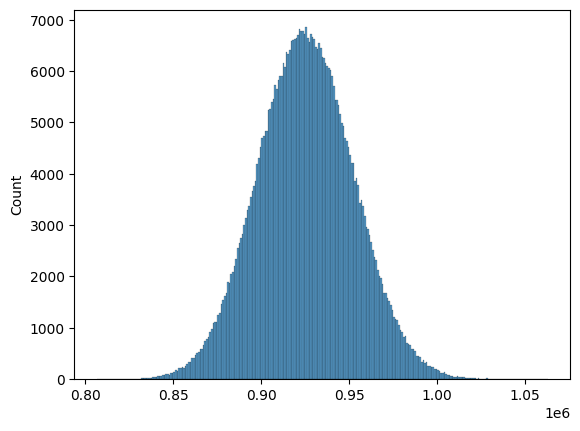

In [ ]:
sns.histplot(male_sample_mean_1000)

<Axes: ylabel='Count'>

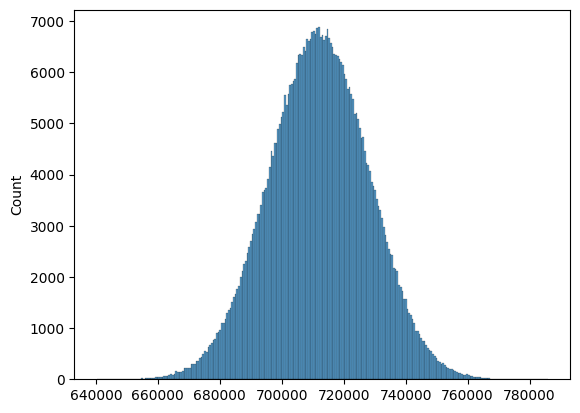

In [ ]:
sns.histplot(female_sample_mean_1000)

###Confidence Intervals

In [ ]:
print(f"Male Population purchase Confidence interval :")
male_pop_mean = np.mean(male_sample_mean_1000).round(2)
print(f"Population purchase mean for male : {male_pop_mean}")
pop_std_dev = np.std(male_sample_mean_1000).round(2)
print(f"Population purchase standard deviation for male : {pop_std_dev}")
se = pop_std_dev/np.sqrt(1000)
x1 =  (male_pop_mean + (z1 * se)).round(2)
x2 =  (male_pop_mean + (z_score_90 * se)).round(2)
print(f"The 90% confidence interval --> {x1} to {x2}")
x1 =  (male_pop_mean + (z2 * se)).round(2)
x2 =  (male_pop_mean + (z_score_95 * se)).round(2)
print(f"The 95% confidence interval --> {x1} to {x2}")
x1 =  (male_pop_mean + (z3 * se)).round(2)
x2 =  (male_pop_mean + (z_score_99 * se)).round(2)
print(f"The 99% confidence interval --> {x1} to {x2}")

Male Population purchase Confidence interval :
Population purchase mean for male : 925319.27
Population purchase standard deviation for male : 27215.03
The 90% confidence interval --> 923903.68 to 926422.19
The 95% confidence interval --> 923632.5 to 926734.86
The 99% confidence interval --> 923102.47 to 927321.36


In [ ]:
print(f"Female Population purchase Confidence interval :")
female_pop_mean = np.mean(female_sample_mean_1000).round(2)
print(f"Population purchase mean for female : {female_pop_mean}")
pop_std_dev = np.std(female_sample_mean_1000).round(2)
print(f"Population purchase standard deviation for female : {pop_std_dev}")
se = pop_std_dev/np.sqrt(1000)
x1 =  (female_pop_mean + (z1 * se)).round(2)
x2 =  (female_pop_mean + (z_score_90 * se)).round(2)
print(f"The 90% confidence interval --> {x1} to {x2}")
x1 =  (female_pop_mean + (z2 * se)).round(2)
x2 =  (female_pop_mean + (z_score_95 * se)).round(2)
print(f"The 95% confidence interval --> {x1} to {x2}")
x1 =  (female_pop_mean + (z3 * se)).round(2)
x2 =  (female_pop_mean + (z_score_99 * se)).round(2)
print(f"The 99% confidence interval --> {x1} to {x2}")

Female Population purchase Confidence interval :
Population purchase mean for female : 711986.77
Population purchase standard deviation for female : 16140.83
The 90% confidence interval --> 711147.21 to 712640.9
The 95% confidence interval --> 710986.37 to 712826.33
The 99% confidence interval --> 710672.02 to 713174.18


## Bootstrapping of purchase sample means for CLT Marital_Statuswise

In [125]:
single = cust_table[cust_table["Marital_Status"]==0]
married = cust_table[cust_table["Marital_Status"]==1]
sample_size_100 = 100
sample_size_500 = 500
sample_size_1000 = 1000

#### For Sample size 100

In [126]:
single_pop_mean_100 = [np.mean(single['Purchase'].sample(sample_size_100)) for i in range(500000)]
married_pop_mean_100 = [np.mean(single['Purchase'].sample(sample_size_100)) for i in range(500000)]

In [ ]:
len(single_pop_mean_100)

500000

In [ ]:
len(married_pop_mean_100)

500000

<Axes: ylabel='Count'>

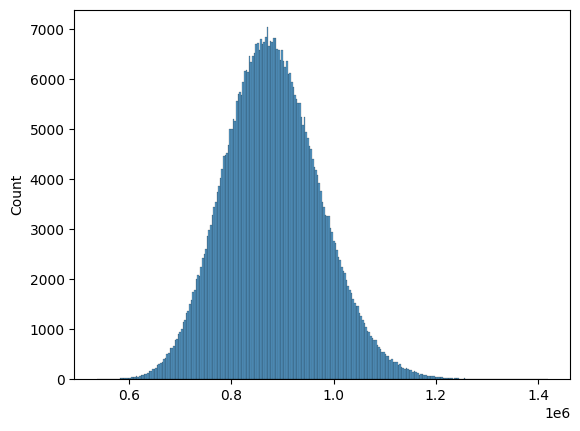

In [ ]:
sns.histplot(single_pop_mean_100)

<Axes: ylabel='Count'>

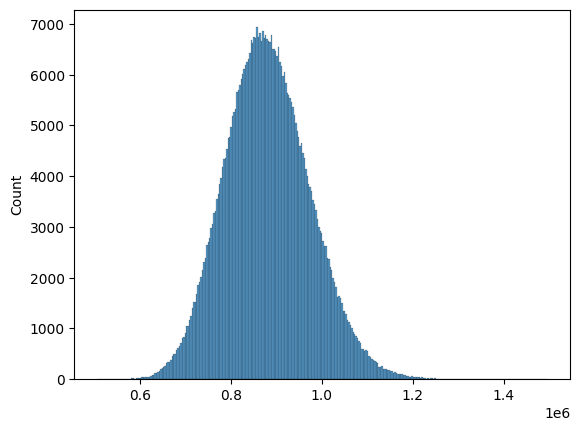

In [ ]:
sns.histplot(married_pop_mean_100)

###Confidence Intervals

In [127]:
print(f"Single status Population purchase Confidence interval :")
single_pop_mean = np.mean(single_pop_mean_100).round(2)
print(f"Population purchase mean for single customers : {single_pop_mean}")
pop_std_dev = np.std(single_pop_mean_100).round(2)
print(f"Population purchase standard deviation for single customers : {pop_std_dev}")
se = pop_std_dev/np.sqrt(sample_size_100)
x1 =  (single_pop_mean + (z1 * se)).round(2)
x2 =  (single_pop_mean + (z_score_90 * se)).round(2)
print(f"The 90% confidence interval --> {x1} to {x2}")
x1 =  (single_pop_mean + (z2 * se)).round(2)
x2 =  (single_pop_mean + (z_score_95 * se)).round(2)
print(f"The 95% confidence interval --> {x1} to {x2}")
x1 =  (single_pop_mean + (z3 * se)).round(2)
x2 =  (single_pop_mean + (z_score_99 * se)).round(2)
print(f"The 99% confidence interval --> {x1} to {x2}")

Single status Population purchase Confidence interval :
Population purchase mean for single customers : 880644.57
Population purchase standard deviation for single customers : 93557.07
The 90% confidence interval --> 865255.8 to 896033.34
The 95% confidence interval --> 862307.72 to 898981.42
The 99% confidence interval --> 856545.87 to 904743.27


In [ ]:
print(f"Married status Population purchase Confidence interval :")
married_pop_mean = np.mean(married_pop_mean_100).round(2)
print(f"Population purchase mean for married customers : {married_pop_mean}")
pop_std_dev = np.std(married_pop_mean_100).round(2)
print(f"Population purchase standard deviation for married customers : {pop_std_dev}")
se = pop_std_dev/np.sqrt(sample_size_100)
x1 =  (married_pop_mean + (z1 * se)).round(2)
x2 =  (married_pop_mean + (z_score_90 * se)).round(2)
print(f"The 90% confidence interval --> {x1} to {x2}")
x1 =  (married_pop_mean + (z2 * se)).round(2)
x2 =  (married_pop_mean + (z_score_95 * se)).round(2)
print(f"The 95% confidence interval --> {x1} to {x2}")
x1 =  (married_pop_mean + (z3 * se)).round(2)
x2 =  (married_pop_mean + (z_score_99 * se)).round(2)
print(f"The 99% confidence interval --> {x1} to {x2}")

Married status Population purchase Confidence interval :
Population purchase mean for married customers : 880670.55
Population purchase standard deviation for married customers : 93525.51
The 90% confidence interval --> 865286.97 to 892656.33
The 95% confidence interval --> 862339.89 to 896054.13
The 99% confidence interval --> 856579.98 to 902427.84


#### For Sample size 500

In [ ]:
single_pop_mean_500 = [np.mean(single['Purchase'].sample(sample_size_500)) for i in range(500000)]
married_pop_mean_500 = [np.mean(single['Purchase'].sample(sample_size_500)) for i in range(500000)]

In [ ]:
len(single_pop_mean_500)

500000

In [ ]:
len(married_pop_mean_500)

500000

<Axes: ylabel='Count'>

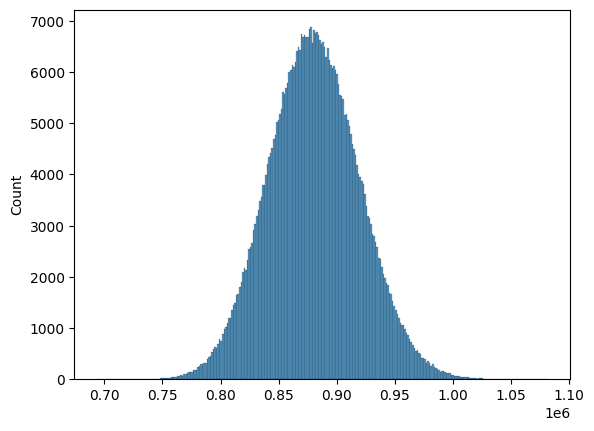

In [ ]:
sns.histplot(single_pop_mean_500)

<Axes: ylabel='Count'>

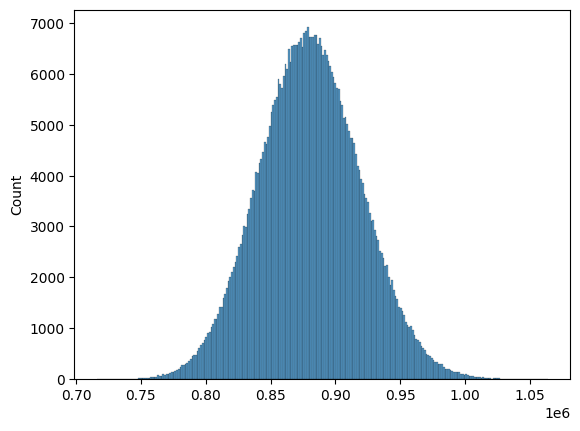

In [ ]:
sns.histplot(married_pop_mean_500)

###Confidence Intervals

In [104]:
print(f"Single status Population purchase Confidence interval :")
single_pop_mean = np.mean(single_pop_mean_500).round(2)
print(f"Population purchase mean for single customers : {single_pop_mean}")
pop_std_dev = np.std(single_pop_mean_500).round(2)
print(f"Population purchase standard deviation for single customers : {pop_std_dev}")
se = pop_std_dev/np.sqrt(sample_size_500)
x1 =  (single_pop_mean + (z1 * se)).round(2)
x2 =  (single_pop_mean + (z_score_90 * se)).round(2)
print(f"The 90% confidence interval --> {x1} to {x2}")
x1 =  (single_pop_mean + (z2 * se)).round(2)
x2 =  (single_pop_mean + (z_score_95 * se)).round(2)
print(f"The 95% confidence interval --> {x1} to {x2}")
x1 =  (single_pop_mean + (z3 * se)).round(2)
x2 =  (single_pop_mean + (z_score_99 * se)).round(2)
print(f"The 99% confidence interval --> {x1} to {x2}")

Single status Population purchase Confidence interval :
Population purchase mean for single customers : 880552.12
Population purchase standard deviation for single customers : 39171.48
The 90% confidence interval --> 877670.66 to 883433.58
The 95% confidence interval --> 877118.65 to 883985.59
The 99% confidence interval --> 876039.78 to 885064.46


In [105]:
print(f"Married status Population purchase Confidence interval :")
married_pop_mean = np.mean(married_pop_mean_500).round(2)
print(f"Population purchase mean for married customers : {married_pop_mean}")
pop_std_dev = np.std(married_pop_mean_500).round(2)
print(f"Population purchase standard deviation for married customers : {pop_std_dev}")
se = pop_std_dev/np.sqrt(sample_size_500)
x1 =  (married_pop_mean + (z1 * se)).round(2)
x2 =  (married_pop_mean + (z_score_90 * se)).round(2)
print(f"The 90% confidence interval --> {x1} to {x2}")
x1 =  (married_pop_mean + (z2 * se)).round(2)
x2 =  (married_pop_mean + (z_score_95 * se)).round(2)
print(f"The 95% confidence interval --> {x1} to {x2}")
x1 =  (married_pop_mean + (z3 * se)).round(2)
x2 =  (married_pop_mean + (z_score_99 * se)).round(2)
print(f"The 99% confidence interval --> {x1} to {x2}")

Married status Population purchase Confidence interval :
Population purchase mean for married customers : 880528.06
Population purchase standard deviation for married customers : 39232.81
The 90% confidence interval --> 877642.09 to 883414.03
The 95% confidence interval --> 877089.22 to 883966.9
The 99% confidence interval --> 876008.65 to 885047.47


#### For Sample size 1000

In [ ]:
single_pop_mean_1000 = [np.mean(single['Purchase'].sample(sample_size_1000)) for i in range(500000)]
married_pop_mean_1000 = [np.mean(single['Purchase'].sample(sample_size_1000)) for i in range(500000)]

In [ ]:
len(single_pop_mean_1000)

500000

In [ ]:
len(married_pop_mean_1000)

500000

<Axes: ylabel='Count'>

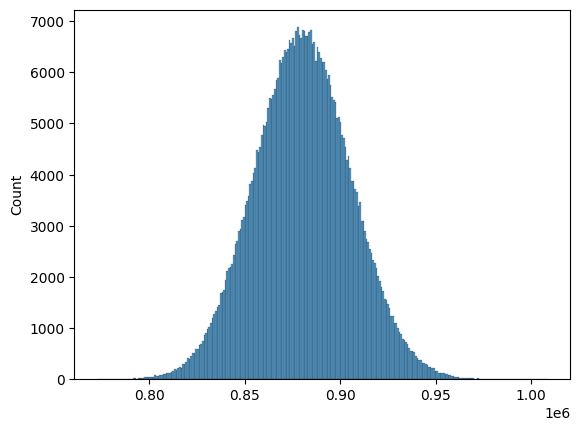

In [ ]:
sns.histplot(single_pop_mean_1000)

<Axes: ylabel='Count'>

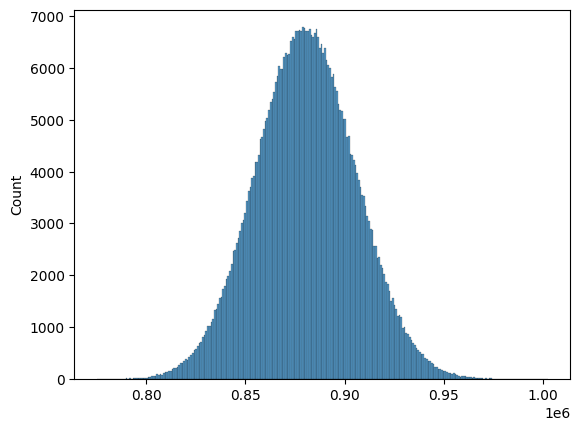

In [ ]:
sns.histplot(married_pop_mean_1000)

###Confidence Intervals

In [106]:
print(f"Single status Population purchase Confidence interval :")
single_pop_mean = np.mean(single_pop_mean_1000).round(2)
print(f"Population purchase mean for single customers : {single_pop_mean}")
pop_std_dev = np.std(single_pop_mean_1000).round(2)
print(f"Population purchase standard deviation for single customers : {pop_std_dev}")
se = pop_std_dev/np.sqrt(sample_size_1000)
x1 =  (single_pop_mean + (z1 * se)).round(2)
x2 =  (single_pop_mean + (z_score_90 * se)).round(2)
print(f"The 90% confidence interval --> {x1} to {x2}")
x1 =  (single_pop_mean + (z2 * se)).round(2)
x2 =  (single_pop_mean + (z_score_95 * se)).round(2)
print(f"The 95% confidence interval --> {x1} to {x2}")
x1 =  (single_pop_mean + (z3 * se)).round(2)
x2 =  (single_pop_mean + (z_score_99 * se)).round(2)
print(f"The 99% confidence interval --> {x1} to {x2}")

Single status Population purchase Confidence interval :
Population purchase mean for single customers : 880545.42
Population purchase standard deviation for single customers : 25262.89
The 90% confidence interval --> 879231.37 to 881859.47
The 95% confidence interval --> 878979.64 to 882111.2
The 99% confidence interval --> 878487.63 to 882603.21


In [107]:
print(f"Married status Population purchase Confidence interval :")
married_pop_mean = np.mean(married_pop_mean_1000).round(2)
print(f"Population purchase mean for married customers : {married_pop_mean}")
pop_std_dev = np.std(married_pop_mean_1000).round(2)
print(f"Population purchase standard deviation for married customers : {pop_std_dev}")
se = pop_std_dev/np.sqrt(sample_size_1000)
x1 =  (married_pop_mean + (z1 * se)).round(2)
x2 =  (married_pop_mean + (z_score_90 * se)).round(2)
print(f"The 90% confidence interval --> {x1} to {x2}")
x1 =  (married_pop_mean + (z2 * se)).round(2)
x2 =  (married_pop_mean + (z_score_95 * se)).round(2)
print(f"The 95% confidence interval --> {x1} to {x2}")
x1 =  (married_pop_mean + (z3 * se)).round(2)
x2 =  (married_pop_mean + (z_score_99 * se)).round(2)
print(f"The 99% confidence interval --> {x1} to {x2}")

Married status Population purchase Confidence interval :
Population purchase mean for married customers : 880595.57
Population purchase standard deviation for married customers : 25265.45
The 90% confidence interval --> 879281.39 to 881909.75
The 95% confidence interval --> 879029.63 to 882161.51
The 99% confidence interval --> 878537.58 to 882653.56


## Bootstrapping of purchase sample means for CLT Agewise

In [ ]:
age_categories = []
for i in cust_table["Age"].unique():
  age_categories.append(i)
print(age_categories)

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']


###For Sample size 100

In [ ]:
age_cat_0_17 = [np.mean(cust_table[cust_table["Age"]== '0-17']["Purchase"].sample(sample_size_100)) for i in range(500000)]

In [ ]:
age_cat_18_25 = [np.mean(cust_table[cust_table["Age"]== '18-25']["Purchase"].sample(sample_size_100)) for i in range(500000)]

In [ ]:
age_cat_26_35 = [np.mean(cust_table[cust_table["Age"]== '26-35']["Purchase"].sample(sample_size_100)) for i in range(500000)]

In [ ]:
age_cat_36_45 = [np.mean(cust_table[cust_table["Age"]== '36-45']["Purchase"].sample(sample_size_100)) for i in range(500000)]

In [ ]:
age_cat_46_50 = [np.mean(cust_table[cust_table["Age"]== '46-50']["Purchase"].sample(sample_size_100)) for i in range(500000)]

In [47]:
age_cat_51_55 = [np.mean(cust_table[cust_table["Age"]== '51-55']["Purchase"].sample(sample_size_100)) for i in range(500000)]

In [50]:
age_cat_55plus = [np.mean(cust_table[cust_table["Age"]== '55+']["Purchase"].sample(sample_size_100)) for i in range(500000)]

In [60]:
age_cat_0_17[:5], print(len(age_cat_0_17))

500000


([599036.02, 636989.17, 632657.94, 622496.44, 615813.5], None)

In [61]:
age_cat_18_25[:5], print(len(age_cat_18_25))

500000


([1008190.83, 755255.68, 889751.59, 887718.06, 809553.46], None)

In [62]:
age_cat_26_35[:5], print(len(age_cat_26_35))

500000


([727705.88, 931072.46, 1005898.55, 1082097.06, 937793.75], None)

In [63]:
age_cat_36_45[:5], print(len(age_cat_36_45))

500000


([843371.59, 769566.01, 930313.62, 832707.94, 946507.77], None)

In [64]:
age_cat_46_50[:5], print(len(age_cat_46_50))

500000


([762185.98, 809438.7, 871504.41, 713016.09, 825092.04], None)

In [65]:
age_cat_51_55[:5], print(len(age_cat_51_55))

500000


([767872.22, 769610.89, 699291.68, 771438.31, 819657.05], None)

In [66]:
age_cat_55plus[:5], print(len(age_cat_55plus))

500000


([467961.16, 689053.85, 596083.62, 531247.51, 589583.59], None)

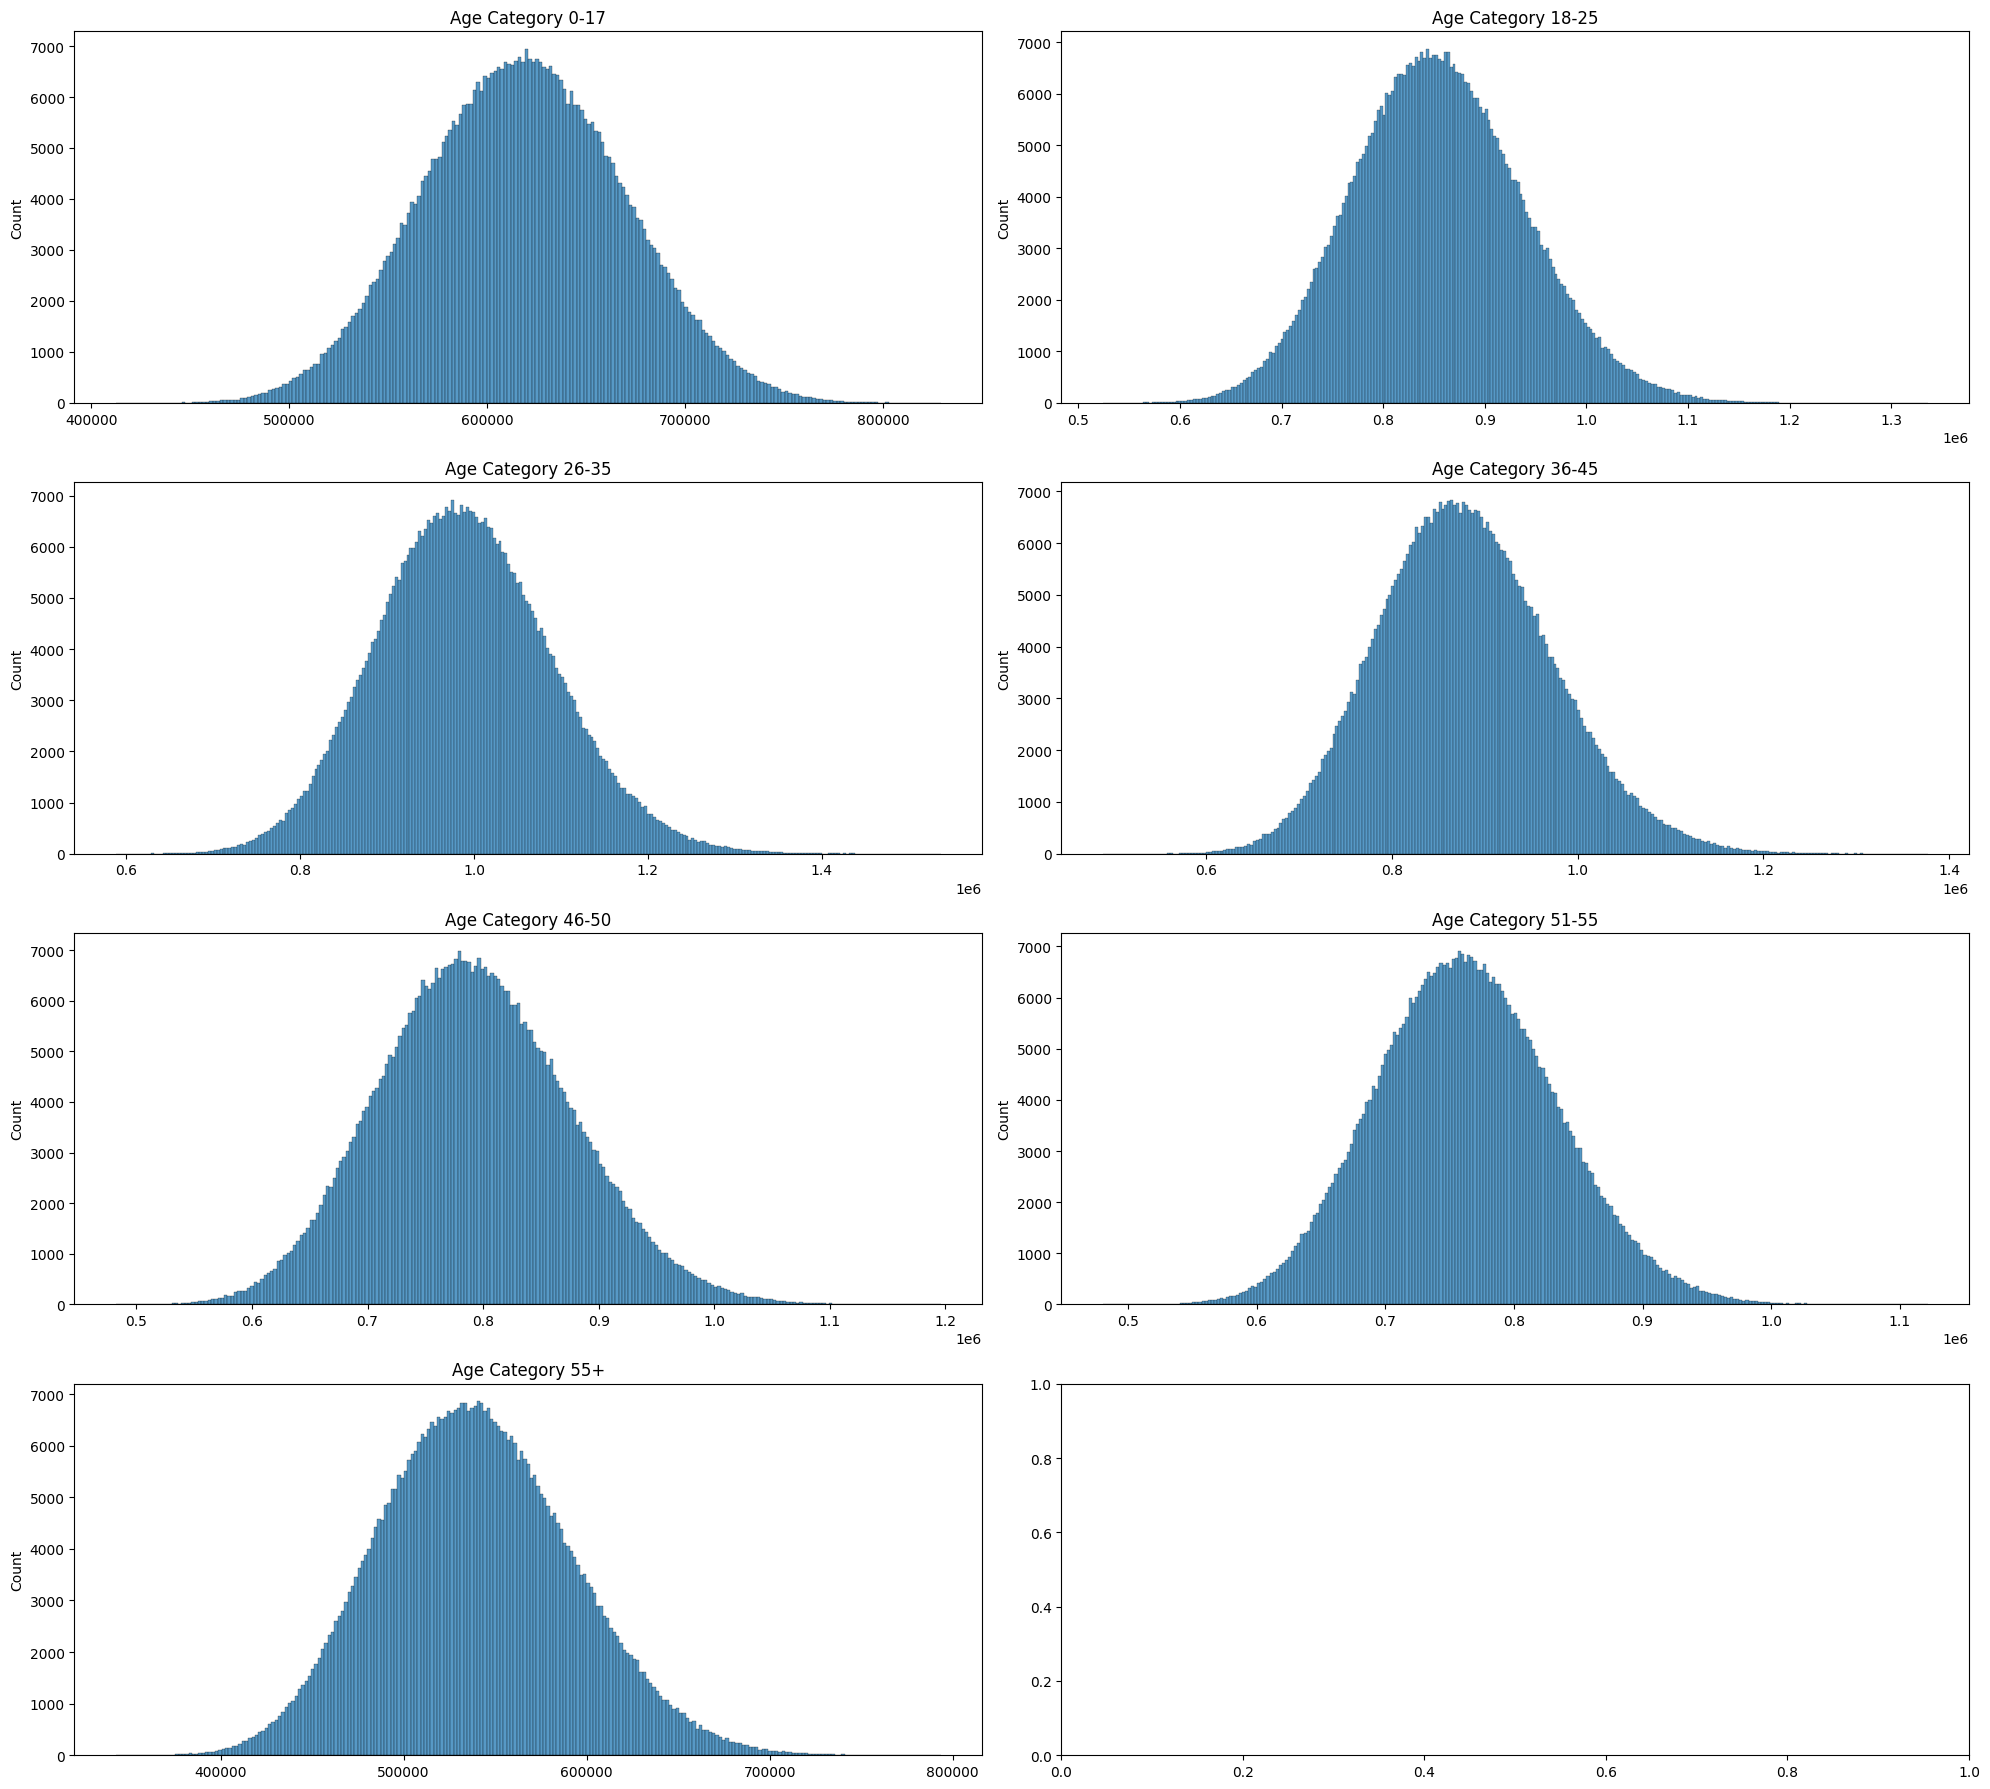

In [79]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(20, 18))

sns.histplot(age_cat_0_17, ax=axis[0,0])
sns.histplot(age_cat_18_25, ax=axis[0,1])
sns.histplot(age_cat_26_35, ax=axis[1,0])
sns.histplot(age_cat_36_45, ax=axis[1,1])
sns.histplot(age_cat_46_50, ax=axis[2,0])
sns.histplot(age_cat_51_55, ax=axis[2,1])
sns.histplot(age_cat_55plus, ax=axis[3,0])


axis[0, 0].set_title('Age Category 0-17')
axis[0, 1].set_title('Age Category 18-25')
axis[1, 0].set_title('Age Category 26-35')
axis[1, 1].set_title('Age Category 36-45')
axis[2, 0].set_title('Age Category 46-50')
axis[2, 1].set_title('Age Category 51-55')
axis[3, 0].set_title('Age Category 55+')

plt.tight_layout()

plt.show()


###Confidence Intervals

In [108]:
print(f"Population purchase Confidence interval for Age Category 0-17")
age_pop_mean = np.mean(age_cat_0_17).round(2)
print(f"Population purchase mean for Age Category 0-17 : {age_pop_mean}")
pop_std_dev = np.std(age_cat_0_17).round(2)
print(f"Population purchase standard deviation for Age Category 0-17 : {pop_std_dev}")
se = pop_std_dev/np.sqrt(sample_size_100)
x1 =  (age_pop_mean + (z1 * se)).round(2)
x2 =  (age_pop_mean + (z_score_90 * se)).round(2)
print(f"The 90% confidence interval --> {x1} to {x2}")
x1 =  (age_pop_mean + (z2 * se)).round(2)
x2 =  (age_pop_mean + (z_score_95 * se)).round(2)
print(f"The 95% confidence interval --> {x1} to {x2}")
x1 =  (age_pop_mean + (z3 * se)).round(2)
x2 =  (age_pop_mean + (z_score_99 * se)).round(2)
print(f"The 99% confidence interval --> {x1} to {x2}")

Population purchase Confidence interval for Age Category 0-17
Population purchase mean for Age Category 0-17 : 618713.92
Population purchase standard deviation for Age Category 0-17 : 50533.07
The 90% confidence interval --> 610401.97 to 627025.87
The 95% confidence interval --> 608809.62 to 628618.22
The 99% confidence interval --> 605697.46 to 631730.38


In [109]:
print(f"Population purchase Confidence interval for Age Category 18-25")
age_pop_mean = np.mean(age_cat_18_25).round(2)
print(f"Population purchase mean for Age Category 18-25 : {age_pop_mean}")
pop_std_dev = np.std(age_cat_18_25).round(2)
print(f"Population purchase standard deviation for Age Category 18-25 : {pop_std_dev}")
se = pop_std_dev/np.sqrt(sample_size_100)
x1 =  (age_pop_mean + (z1 * se)).round(2)
x2 =  (age_pop_mean + (z_score_90 * se)).round(2)
print(f"The 90% confidence interval --> {x1} to {x2}")
x1 =  (age_pop_mean + (z2 * se)).round(2)
x2 =  (age_pop_mean + (z_score_95 * se)).round(2)
print(f"The 95% confidence interval --> {x1} to {x2}")
x1 =  (age_pop_mean + (z3 * se)).round(2)
x2 =  (age_pop_mean + (z_score_99 * se)).round(2)
print(f"The 99% confidence interval --> {x1} to {x2}")

Population purchase Confidence interval for Age Category 18-25
Population purchase mean for Age Category 18-25 : 854787.8
Population purchase standard deviation for Age Category 18-25 : 84587.85
The 90% confidence interval --> 840874.34 to 868701.26
The 95% confidence interval --> 838208.89 to 871366.71
The 99% confidence interval --> 832999.41 to 876576.19


In [110]:
print(f"Population purchase Confidence interval for Age Category 26-35")
age_pop_mean = np.mean(age_cat_26_35).round(2)
print(f"Population purchase mean for Age Category 26-35 : {age_pop_mean}")
pop_std_dev = np.std(age_cat_26_35).round(2)
print(f"Population purchase standard deviation for Age Category 26-35 : {pop_std_dev}")
se = pop_std_dev/np.sqrt(sample_size_100)
x1 =  (age_pop_mean + (z1 * se)).round(2)
x2 =  (age_pop_mean + (z_score_90 * se)).round(2)
print(f"The 90% confidence interval --> {x1} to {x2}")
x1 =  (age_pop_mean + (z2 * se)).round(2)
x2 =  (age_pop_mean + (z_score_95 * se)).round(2)
print(f"The 95% confidence interval --> {x1} to {x2}")
x1 =  (age_pop_mean + (z3 * se)).round(2)
x2 =  (age_pop_mean + (z_score_99 * se)).round(2)
print(f"The 99% confidence interval --> {x1} to {x2}")

Population purchase Confidence interval for Age Category 26-35
Population purchase mean for Age Category 26-35 : 989450.49
Population purchase standard deviation for Age Category 26-35 : 100750.13
The 90% confidence interval --> 972878.57 to 1006022.41
The 95% confidence interval --> 969703.83 to 1009197.15
The 99% confidence interval --> 963498.98 to 1015402.0


In [111]:
print(f"Population purchase Confidence interval for Age Category 36-45")
age_pop_mean = np.mean(age_cat_36_45).round(2)
print(f"Population purchase mean for Age Category 36-45 : {age_pop_mean}")
pop_std_dev = np.std(age_cat_36_45).round(2)
print(f"Population purchase standard deviation for Age Category 36-45 : {pop_std_dev}")
se = pop_std_dev/np.sqrt(sample_size_100)
x1 =  (age_pop_mean + (z1 * se)).round(2)
x2 =  (age_pop_mean + (z_score_90 * se)).round(2)
print(f"The 90% confidence interval --> {x1} to {x2}")
x1 =  (age_pop_mean + (z2 * se)).round(2)
x2 =  (age_pop_mean + (z_score_95 * se)).round(2)
print(f"The 95% confidence interval --> {x1} to {x2}")
x1 =  (age_pop_mean + (z3 * se)).round(2)
x2 =  (age_pop_mean + (z_score_99 * se)).round(2)
print(f"The 99% confidence interval --> {x1} to {x2}")

Population purchase Confidence interval for Age Category 36-45
Population purchase mean for Age Category 36-45 : 879709.02
Population purchase standard deviation for Age Category 36-45 : 93740.36
The 90% confidence interval --> 864290.1 to 895127.94
The 95% confidence interval --> 861336.25 to 898081.79
The 99% confidence interval --> 855563.1 to 903854.94


In [112]:
print(f"Population purchase Confidence interval for Age Category 46-50")
age_pop_mean = np.mean(age_cat_46_50).round(2)
print(f"Population purchase mean for Age Category 46-50 : {age_pop_mean}")
pop_std_dev = np.std(age_cat_46_50).round(2)
print(f"Population purchase standard deviation for Age Category 46-50 : {pop_std_dev}")
se = pop_std_dev/np.sqrt(sample_size_100)
x1 =  (age_pop_mean + (z1 * se)).round(2)
x2 =  (age_pop_mean + (z_score_90 * se)).round(2)
print(f"The 90% confidence interval --> {x1} to {x2}")
x1 =  (age_pop_mean + (z2 * se)).round(2)
x2 =  (age_pop_mean + (z_score_95 * se)).round(2)
print(f"The 95% confidence interval --> {x1} to {x2}")
x1 =  (age_pop_mean + (z3 * se)).round(2)
x2 =  (age_pop_mean + (z_score_99 * se)).round(2)
print(f"The 99% confidence interval --> {x1} to {x2}")

Population purchase Confidence interval for Age Category 46-50
Population purchase mean for Age Category 46-50 : 792675.07
Population purchase standard deviation for Age Category 46-50 : 83619.82
The 90% confidence interval --> 778920.83 to 806429.31
The 95% confidence interval --> 776285.89 to 809064.25
The 99% confidence interval --> 771136.03 to 814214.11


In [113]:
print(f"Population purchase Confidence interval for Age Category 51-55")
age_pop_mean = np.mean(age_cat_51_55).round(2)
print(f"Population purchase mean for Age Category 51-55 : {age_pop_mean}")
pop_std_dev = np.std(age_cat_51_55).round(2)
print(f"Population purchase standard deviation for Age Category 51-55 : {pop_std_dev}")
se = pop_std_dev/np.sqrt(sample_size_100)
x1 =  (age_pop_mean + (z1 * se)).round(2)
x2 =  (age_pop_mean + (z_score_90 * se)).round(2)
print(f"The 90% confidence interval --> {x1} to {x2}")
x1 =  (age_pop_mean + (z2 * se)).round(2)
x2 =  (age_pop_mean + (z_score_95 * se)).round(2)
print(f"The 95% confidence interval --> {x1} to {x2}")
x1 =  (age_pop_mean + (z3 * se)).round(2)
x2 =  (age_pop_mean + (z_score_99 * se)).round(2)
print(f"The 99% confidence interval --> {x1} to {x2}")

Population purchase Confidence interval for Age Category 51-55
Population purchase mean for Age Category 51-55 : 763210.56
Population purchase standard deviation for Age Category 51-55 : 70333.06
The 90% confidence interval --> 751641.8 to 774779.32
The 95% confidence interval --> 749425.53 to 776995.59
The 99% confidence interval --> 745093.96 to 781327.16


In [114]:
print(f"Population purchase Confidence interval for Age Category 55+")
age_pop_mean = np.mean(age_cat_55plus).round(2)
print(f"Population purchase mean for Age Category 55+ : {age_pop_mean}")
pop_std_dev = np.std(age_cat_55plus).round(2)
print(f"Population purchase standard deviation for Age Category 55+ : {pop_std_dev}")
se = pop_std_dev/np.sqrt(sample_size_100)
x1 =  (age_pop_mean + (z1 * se)).round(2)
x2 =  (age_pop_mean + (z_score_90 * se)).round(2)
print(f"The 90% confidence interval --> {x1} to {x2}")
x1 =  (age_pop_mean + (z2 * se)).round(2)
x2 =  (age_pop_mean + (z_score_95 * se)).round(2)
print(f"The 95% confidence interval --> {x1} to {x2}")
x1 =  (age_pop_mean + (z3 * se)).round(2)
x2 =  (age_pop_mean + (z_score_99 * se)).round(2)
print(f"The 99% confidence interval --> {x1} to {x2}")

Population purchase Confidence interval for Age Category 55+
Population purchase mean for Age Category 55+ : 539675.11
Population purchase standard deviation for Age Category 55+ : 52747.98
The 90% confidence interval --> 530998.84 to 548351.38
The 95% confidence interval --> 529336.7 to 550013.52
The 99% confidence interval --> 526088.13 to 553262.09


##Genderwise segmentation for products

In [12]:
products = pd.crosstab(index = df["Product_ID"], columns = df["Gender"], values = df["Purchase"], aggfunc = ["count", "sum"]).reset_index()
products.head()

Product_ID  count               sum           
Gender                 F      M          F          M
0       P00000142  347.0  805.0  3915603.0  8921873.0
1       P00000242   91.0  285.0   953005.0  3014491.0
2       P00000342   69.0  175.0   382566.0   913909.0
3       P00000442   46.0   46.0   236177.0   204996.0
4       P00000542   50.0   99.0   283740.0   523472.0

In [19]:
products.loc[products["sum"]["F"] == products["sum"]["F"].max()]

Product_ID  count                sum            
Gender                 F       M          F           M
2443    P00255842  375.0  1008.0  6858212.0  18310751.0

In [20]:
products.loc[products["sum"]["M"] == products["sum"]["M"].max()]

Product_ID  count                sum            
Gender                 F       M          F           M
249     P00025442  348.0  1267.0  5865020.0  22130146.0

In [21]:
products.loc[products["count"]["F"] == products["count"]["F"].max()]

Product_ID  count                sum            
Gender                 F       M          F           M
2536    P00265242  508.0  1372.0  3787180.0  10378335.0

In [22]:
products.loc[products["count"]["M"] == products["count"]["M"].max()]

Product_ID  count                sum            
Gender                 F       M          F           M
2536    P00265242  508.0  1372.0  3787180.0  10378335.0

In [24]:
category = pd.crosstab(index = df["Product_Category"], columns = df["Gender"], values = df["Purchase"], aggfunc = ["count", "sum"]).reset_index()
category.head()

Product_Category  count                sum            
Gender                       F       M          F           M
0                     1  24831  115547  337631145  1572382609
1                     2   5658   18206   64543617   203972569
2                     3   6006   14207   61637516   142447197
3                     4   3639    8114    8933206    18447282
4                     5  41961  108972  264658078   677177151

In [25]:
category.loc[category["sum"]["F"] == category["sum"]["F"].max()]

Product_Category  count                sum            
Gender                       F       M          F           M
0                     1  24831  115547  337631145  1572382609

In [26]:
category.loc[category["sum"]["M"] == category["sum"]["M"].max()]

Product_Category  count                sum            
Gender                       F       M          F           M
0                     1  24831  115547  337631145  1572382609

In [27]:
category.loc[category["count"]["F"] == category["count"]["F"].max()]

Product_Category  count                sum           
Gender                       F       M          F          M
4                     5  41961  108972  264658078  677177151

In [28]:
category.loc[category["count"]["M"] == category["count"]["M"].max()]

Product_Category  count                sum            
Gender                       F       M          F           M
0                     1  24831  115547  337631145  1572382609

Observation -
Male -
1. Highest selling product P00265242 with total quantity sold - 1372.0
2. Highest selling product order price is P00025442, with total purchase price - 22130146.0
3. 1 is Top category in terms of sells with 115547 products getting sold with total purchase price - 1572382609

Female -
1. Highest selling product P00265242 with total quantity sold - 508.0
2. Highest selling product order price is P00025442, with total purchase price - 6858212.0
3. 5 is Top category in terms of sells with 41961 products getting sold
4. 1 is the top category in terms of purchase price -  337631145

## Visual Analysis

### Univariate Analysis

<Axes: xlabel='Purchase'>

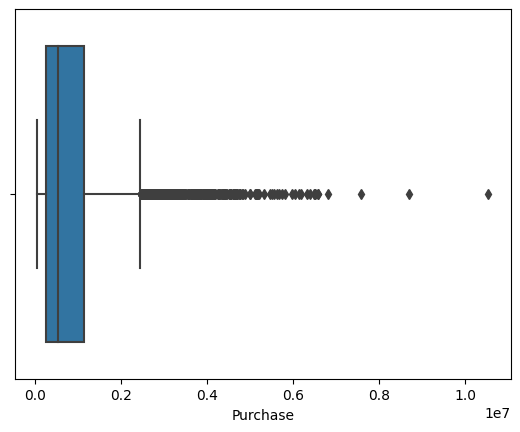

In [52]:
sns.boxplot(data=cust_table, x ='Purchase')

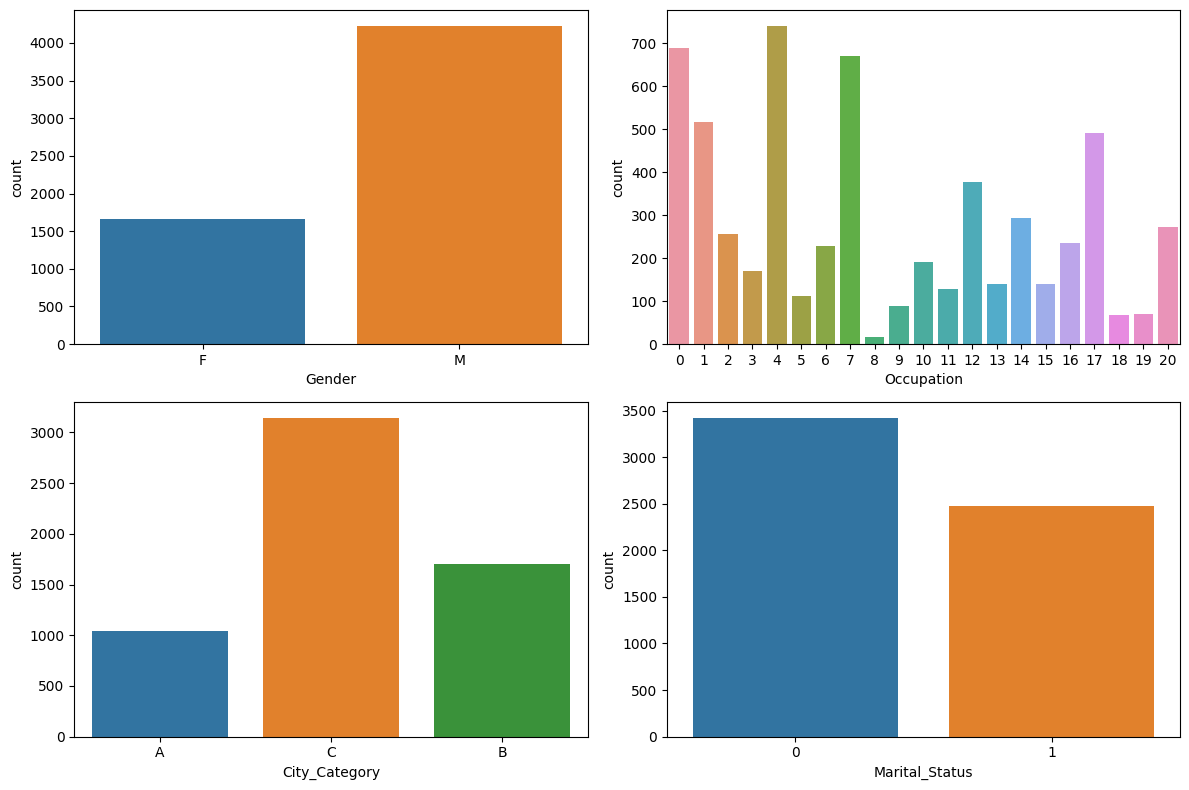

In [42]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
sns.countplot(data=cust_table, x='Gender', ax=axs[0,0])
sns.countplot(data=cust_table, x='Occupation', ax=axs[0,1])
sns.countplot(data=cust_table, x='City_Category', ax=axs[1,0])
sns.countplot(data=cust_table, x='Marital_Status', ax=axs[1,1])
plt.tight_layout()
plt.show()

Observation -
1. Customers from city "C" has high number of transactions.
2. Single customers has high number of transactions.
3. There are more Male customers than Female customers.
4. Customers below occupation 8 have made high number of transactions.

###Bivariate Analysis

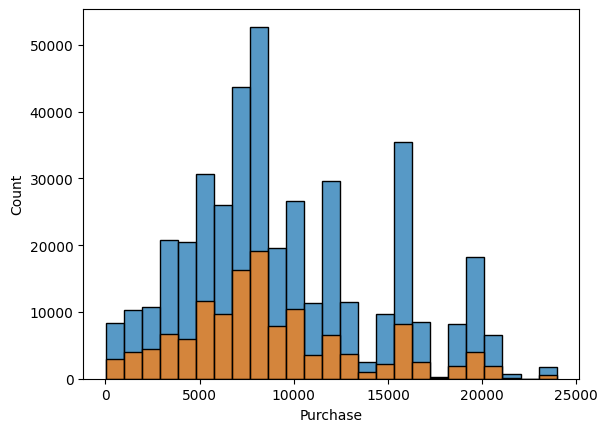

In [63]:
sns.histplot(data=df[df['Gender']=='M']['Purchase'], bins = 25)
sns.histplot(data=df[df['Gender']=='F']['Purchase'], bins = 25)
plt.show()

In [68]:
df.columns.tolist()

['User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category',
 'Purchase']

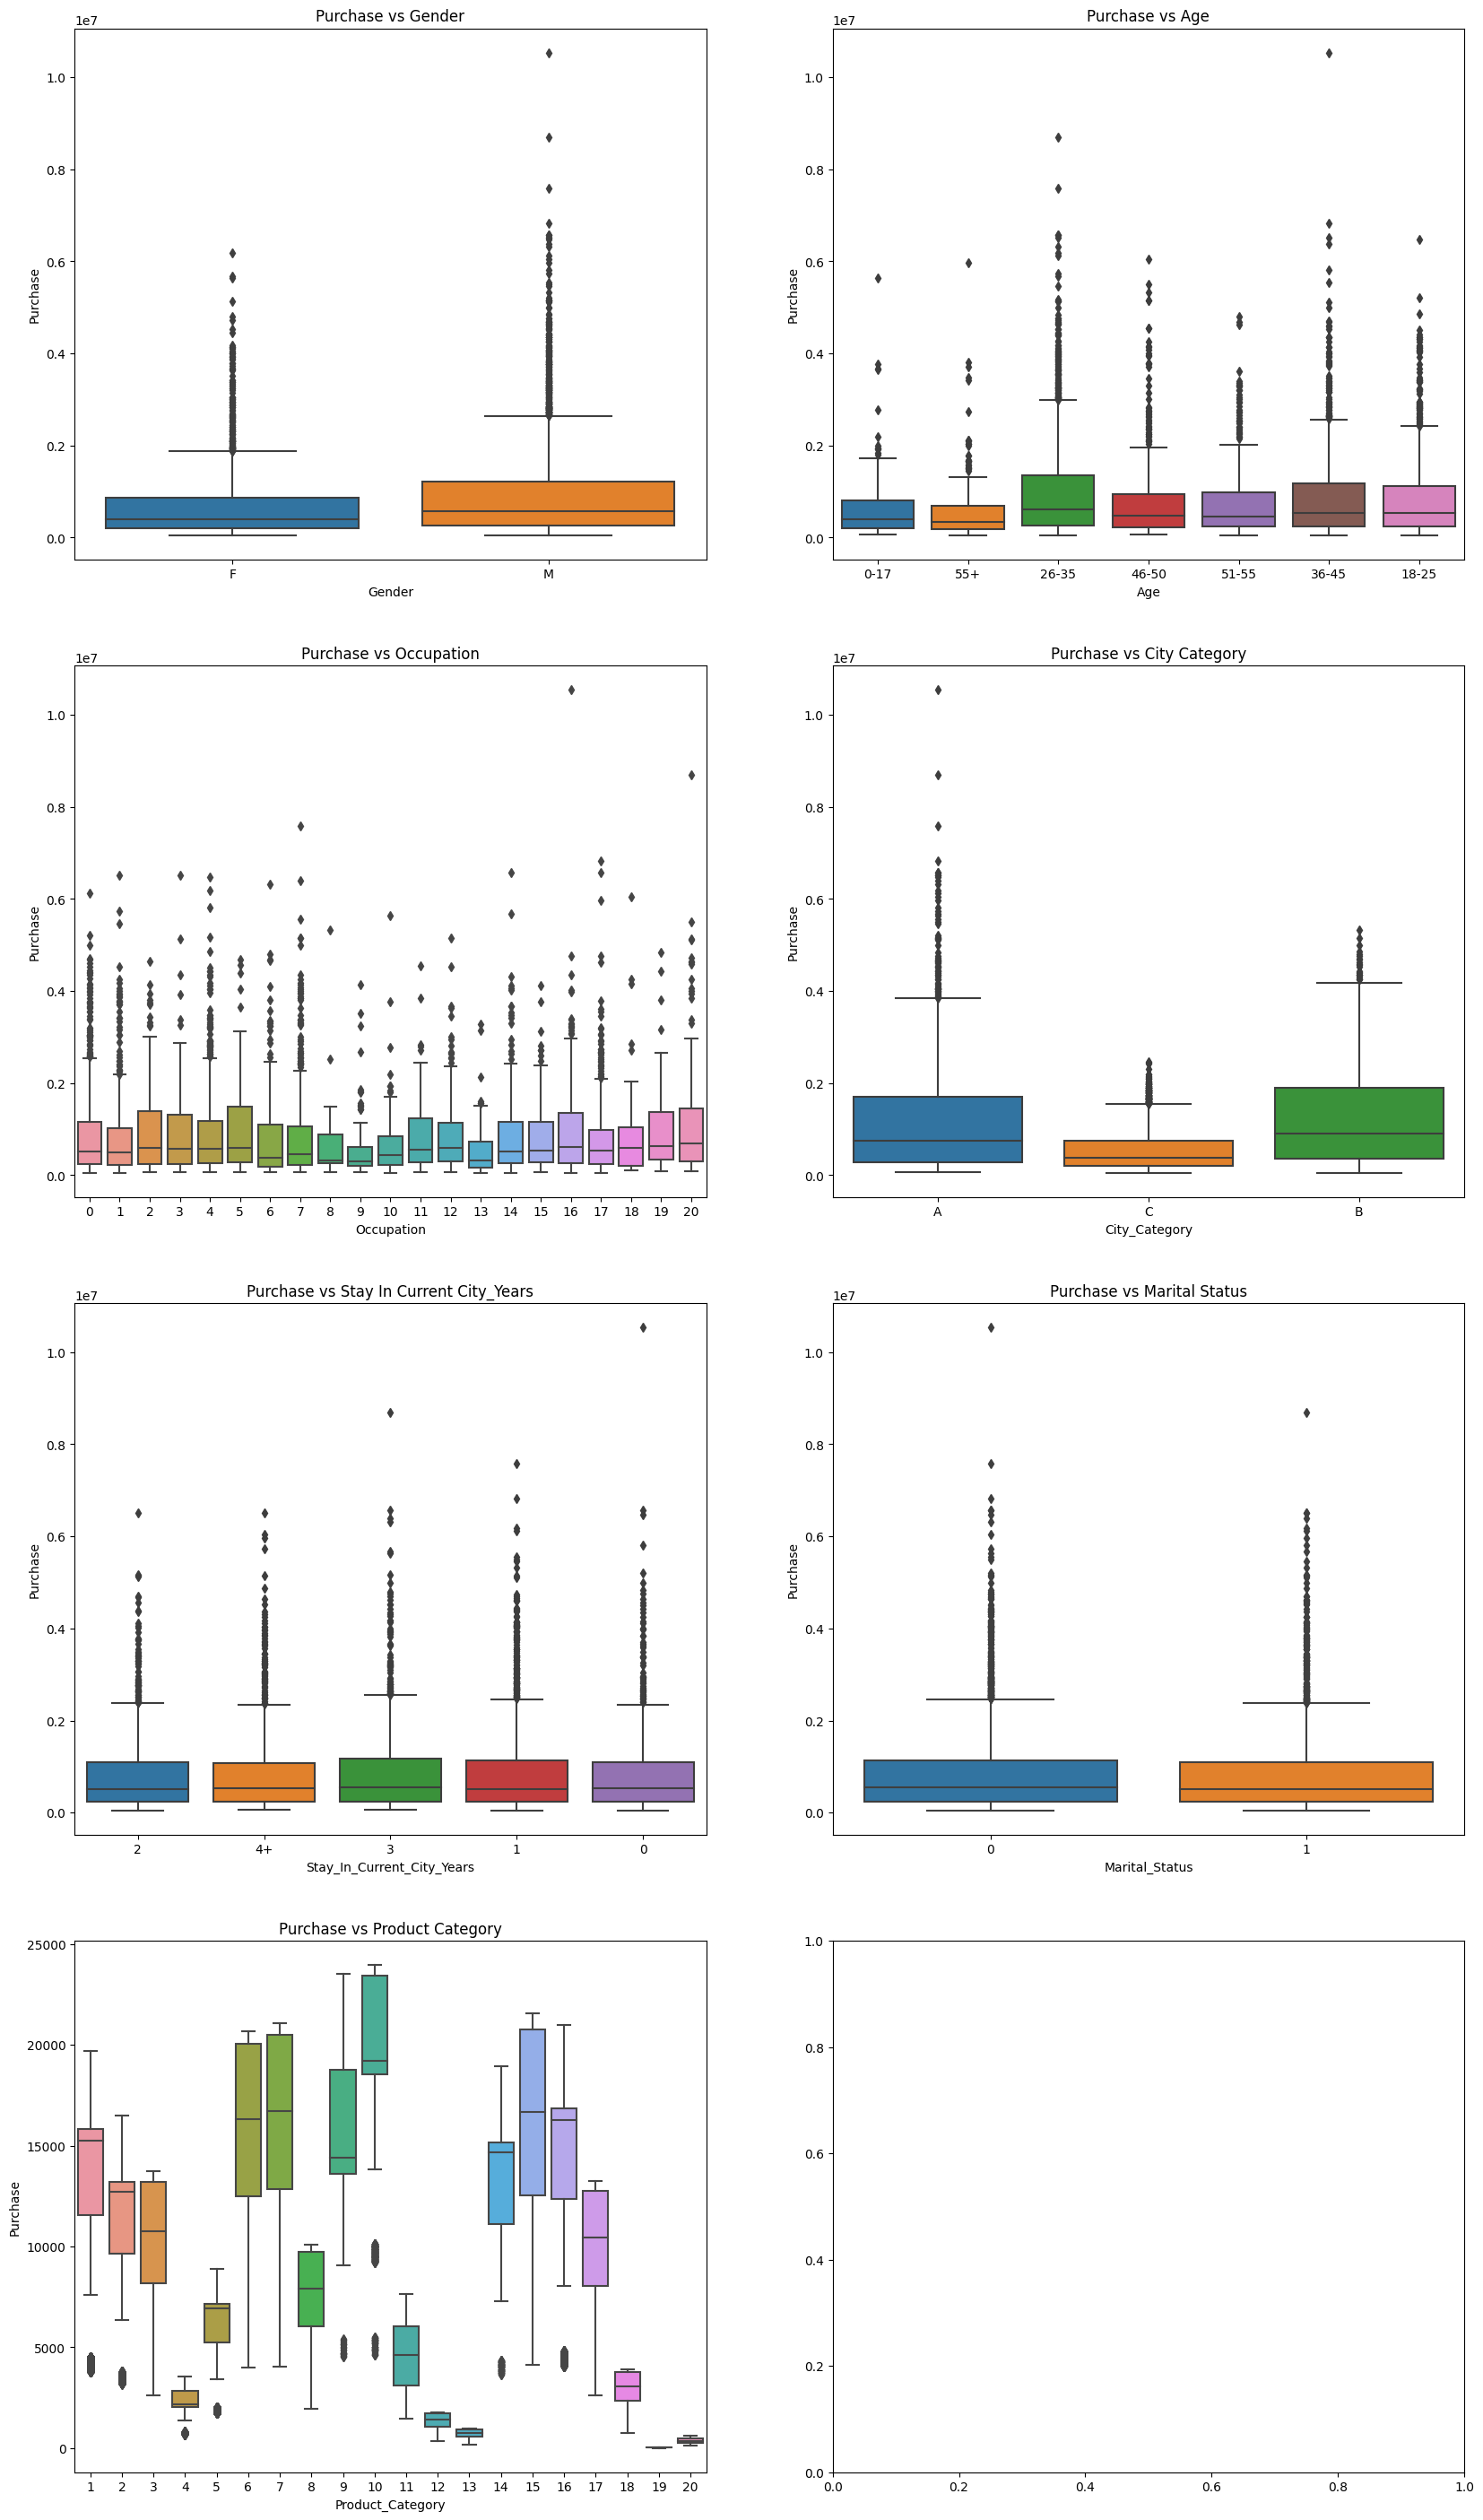

In [129]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 25))
fig.subplots_adjust(top=1.2)
sns.boxplot(data=cust_table, y='Purchase', x = "Gender", ax=axs[0, 0])
sns.boxplot(data=cust_table, y='Purchase', x = "Age", ax=axs[0, 1])
sns.boxplot(data=cust_table, y='Purchase', x = "Occupation", ax=axs[1, 0])
sns.boxplot(data=cust_table, y='Purchase', x = "City_Category", ax=axs[1, 1])
sns.boxplot(data=cust_table, y='Purchase', x = "Stay_In_Current_City_Years", ax=axs[2, 0])
sns.boxplot(data=cust_table, y='Purchase', x = "Marital_Status", ax=axs[2, 1])
sns.boxplot(data=df, y='Purchase', x='Product_Category', ax=axs[3, 0])

axs[0,0].set_title("Purchase vs Gender")
axs[0,1].set_title("Purchase vs Age")
axs[1,0].set_title("Purchase vs Occupation")
axs[1,1].set_title("Purchase vs City Category")
axs[2,0].set_title("Purchase vs Stay In Current City_Years")
axs[2,1].set_title("Purchase vs Marital Status")
axs[3,0].set_title("Purchase vs Product Category")

plt.tight_layout
plt.show()


Observations -
1. Men has spend significantly higher than Women.
2. There are more men with high number of high valued transactions.
3. Customers from agegroup 26-35 have high amount of transactions.
4. Customers from City B & C have high amount of transactions.
5. Product category 10 has high valued items.

###Multivariate Analysis

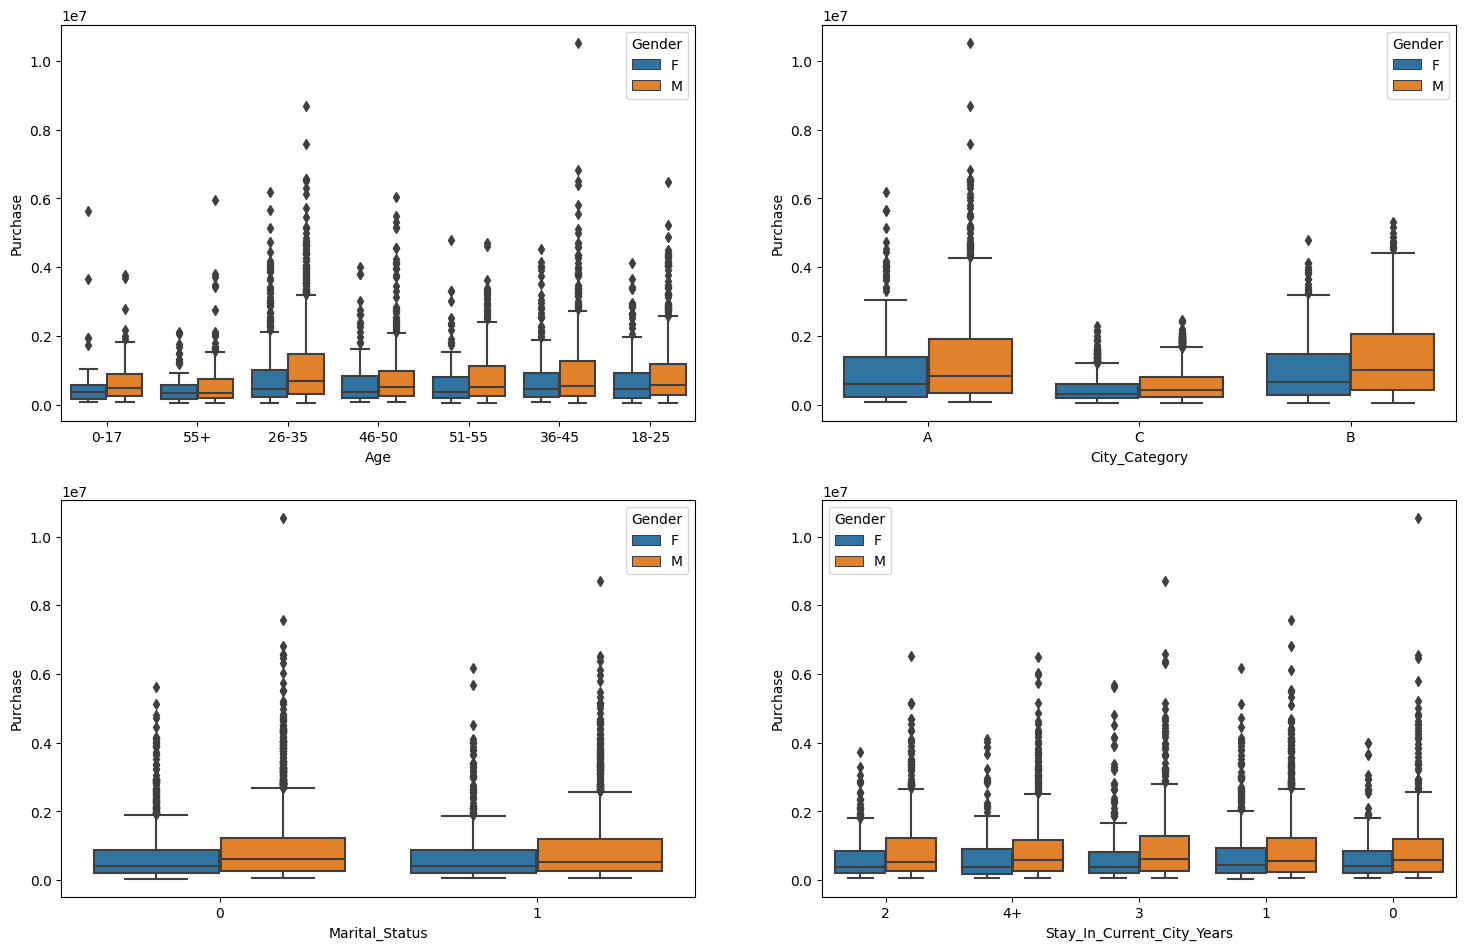

In [132]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 8))

fig.subplots_adjust(top=1.2)

sns.boxplot(data=cust_table, y='Purchase', x='Age', hue='Gender', ax=axs[0,0])
sns.boxplot(data=cust_table, x='Purchase', x='City_Category', hue='Gender', ax=axs[0,1])
sns.boxplot(data=cust_table, y='Purchase', x='Marital_Status', hue='Gender', ax=axs[1,0])
sns.boxplot(data=cust_table, y='Purchase', x='Stay_In_Current_City_Years', hue='Gender', ax=axs[1,1])

plt.tight_layout

plt.show()

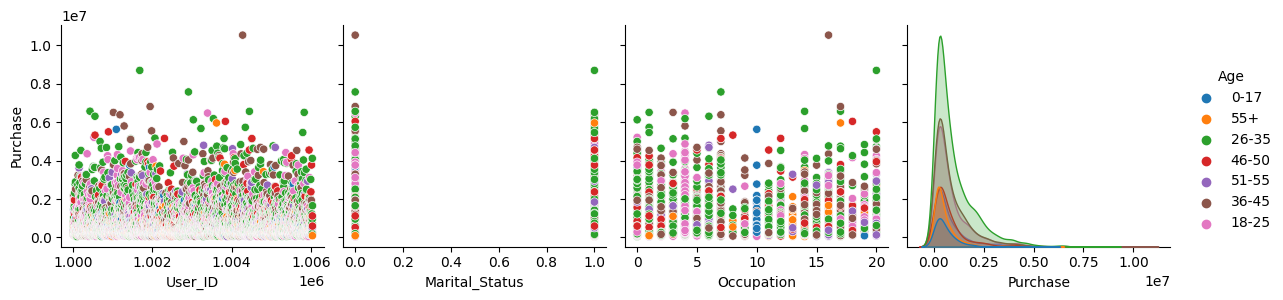

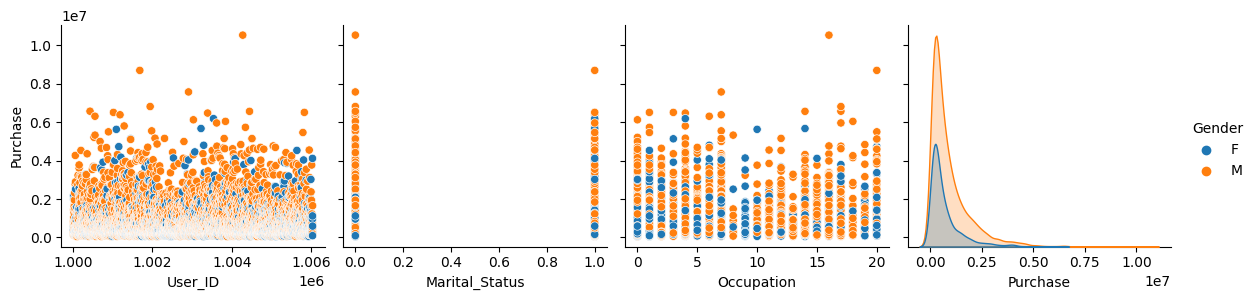

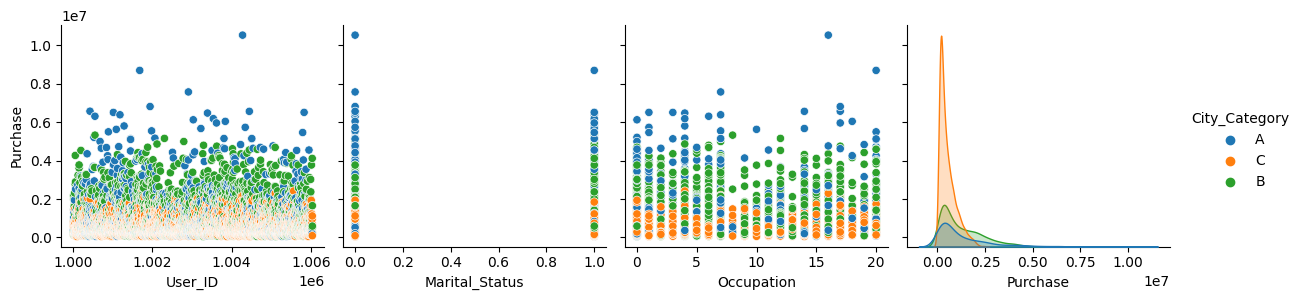

In [123]:
sns.pairplot(data = cust_table, y_vars = "Purchase", hue = "Age",height = 3)
sns.pairplot(data = cust_table, y_vars = "Purchase", hue = "Gender",height = 3)
sns.pairplot(data = cust_table, y_vars = "Purchase", hue = "City_Category",height = 3)
plt.show()

###Observations -
1. In all age categories, Men have shown high spending as compared to Women.
2. In all three cities, Men have shown high spending as compared to Women. Howevever for City A spending is comparitively higher than rest and has outliers.
3. Whether it's single or married, Men have shown high spending as compared to Women. Howevever Single male customers has high spending than married male customers.
4. Men have shown high spending and it didn't matter how long they are staying in the current city. It's almost similar. men have shown high spending as compared to Women.

#Insights:
1. It's been observed that Male has  high spending as compared to female.
2. There is no overlapping with 99% confidence interval of average spending for male and female for mean sample size of 1000.
3. High number of customers are from city "C".However total purchase amount is significantly high from city "B".
4. Customers from agegroup "26-35" have made high number of transactions and also spend comparitively high than other age groups.
5. Customers who occupation is categorised below 8 has spend significantly more than rests.
6. Customers living in the city for 1 year have made huge spending as compared to rests. Most of the transcations are accounted for customers staying in the city for a year.
7. Male -
  Highest selling product P00265242 with total quantity sold - 1372.0.
  Highest selling product order price is P00025442, with total purchase price - 22130146.0.
  "1" is Top category in terms of sells with 115547 products getting sold with total purchase price - 1572382609.
8. Female -
  Highest selling product P00265242 with total quantity sold - 508.0
  Highest selling product order price is P00025442, with total purchase price - 6858212.0.
  "5" is Top category in terms of sells with 41961 products getting sold.
  "1" is the top category in terms of purchase price - 337631145
9. Product category 10 has high priced items.


#Recommendations:



```
1. Trend suggests that male customers who are single have higher spending compared to females. The company should focus on targeting and retaining male customers, as they tend to have higher spending compared to females. This can be achieved through personalized marketing strategies and tailored promotions that cater to the preferences and needs of male customers.

Since female customers have less spending, it is recommended to promote products in female segment by targeted marketing and promotions, this will help gain more customers.

2. Since there is no overlapping with a 99% confidence interval of average spending between males and females for a mean sample size of 1000, it indicates a significant difference in spending patterns. The company can leverage this insight by creating gender-specific marketing campaigns and offering gender-targeted product recommendations.

3. Although there is a higher number of customers from city "C," the total purchase amount is significantly higher in city "B." The company should analyze the reasons behind this discrepancy and consider implementing strategies to increase sales and engagement in city "B" to capture a larger share of the market. So using the strategy from city "C", more customers can be attracted from city "A" and city "B". Using the strategy from city "B", high value products can be sold in City "C" and city "A".

4. Customers in the age group of 26-35 have shown a higher number of transactions and tend to spend more compared to other age groups. The company should prioritize targeting this age group through effective advertising, tailored product offerings, and promotions that resonate with their preferences and lifestyle.

5. Customers with occupations categorized below 8 have been identified as high spenders. The company should consider offering exclusive discounts, loyalty programs, or special perks to customers in these occupation categories to further encourage their spending and loyalty.

It is also recommended to find the product preferences for the customers from occupation 8 and above, so company can offer wide variety of products catering to different needs of people having different occupation.

6. Customers who have been living in the city for one year have demonstrated significant spending compared to other groups. The company should focus on retaining these customers by providing personalized offers, exceptional customer service, and targeted marketing campaigns to strengthen their loyalty and encourage continued engagement.

7. Among male customers, the highest selling product (P00265242) and the highest selling product order price (P00025442) should be given special attention. The company can consider promoting these products further, optimizing their availability, and offering complementary items or discounts to boost sales even more. Similar product offering will help attract more customers.

8. Among female customers, the highest selling product (P00265242) and the highest selling product order price (P00025442) should also be promoted / marketed. The company can leverage the popularity of these products to cross-sell or upsell related products and product category, creating bundled offers or promotions to increase the average purchase value.

9. Product category 10, known for its high-priced items, should be strategically positioned and marketed as a premium category. The company can emphasize the exclusivity and value of these products, targeting customers who are willing to make significant purchases or invest in luxury items.

By incorporating these recommendations, the company can effectively target specific customer segments, optimize product offerings, and tailor marketing strategies to maximize sales and customer satisfaction.
```



#Questions & Answers :



```
**1. Are women spending more money per transaction than men? Why or Why not?**

ANSWER :
Men spending per transaction = 9437.53
Women spending per transaction = 8734.57
It shows that there is a significant difference in the spending amount between Men and Women.
99% confidence interval for Men is 923102.47 to 927321.36 and Women is 710672.02 to 713174.18, which shows that there is overlapping.

Based on standard assumptions that men might be purchasing on behalf of the women. Also, high purchasing poer of men might be the reason why men are spending more money per transactions. Also, possible that women may be looking for better deal to get the product hence they are not buying the product right away in rush.

----------------------------------------------------------------------------

**2. Confidence intervals and distribution of the mean of the expenses by female and male customers**

ANSWER :
Male Population purchase Confidence interval :
Population purchase mean for male : 925319.27
Population purchase standard deviation for male : 27215.03
The 90% confidence interval --> 923903.68 to 926422.19
The 95% confidence interval --> 923632.5 to 926734.86
The 99% confidence interval --> 923102.47 to 927321.36

Female Population purchase Confidence interval :
Population purchase mean for female : 711986.77
Population purchase standard deviation for female : 16140.83
The 90% confidence interval --> 711147.21 to 712640.9
The 95% confidence interval --> 710986.37 to 712826.33
The 99% confidence interval --> 710672.02 to 713174.18

----------------------------------------------------------------------------
**3. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?**

ANSWER :
There is no overlapping of the confidence interval of average spending for male and female. However it's possible that men are buying on behalf of women, so it's important to encourage / attract / influence more women by offering better deals. Since men are going to made the final purchase, facilitating various /flexi payment options would be a good idea. This is reflecting from the agewise categorization as well, that people from age group 18 to 45 are good spenders.

----------------------------------------------------------------------------
**4. Results when the same activity is performed for Married vs Unmarried
Results when the same activity is performed for Age**

ANSWER :
Married vs Unmarried:

Single status Population purchase Confidence interval :
Population purchase mean for single customers : 880545.42
The 99% confidence interval --> 878487.63 to 882603.21

Married status Population purchase Confidence interval :
Population purchase mean for married customers : 880595.57
The 99% confidence interval --> 878537.58 to 882653.56

As there is overlapping of intervals for married and unmarried, we can not say for certain that it will make any difference in the spending.

Age Categories:

Population purchase Confidence interval for Age Category 0-17
Population purchase mean for Age Category 0-17 : 618713.92
The 99% confidence interval --> 605697.46 to 631730.38

Population purchase Confidence interval for Age Category 18-25
Population purchase mean for Age Category 18-25 : 854787.8
The 99% confidence interval --> 832999.41 to 876576.19

Population purchase Confidence interval for Age Category 26-35
Population purchase mean for Age Category 26-35 : 989450.49
The 99% confidence interval --> 963498.98 to 1015402.0

Population purchase Confidence interval for Age Category 36-45
Population purchase mean for Age Category 36-45 : 879709.02
The 99% confidence interval --> 855563.1 to 903854.94

Population purchase Confidence interval for Age Category 46-50
Population purchase mean for Age Category 46-50 : 792675.07
The 99% confidence interval --> 771136.03 to 814214.11

Population purchase Confidence interval for Age Category 51-55
Population purchase mean for Age Category 51-55 : 763210.56
The 99% confidence interval --> 745093.96 to 781327.16

Population purchase Confidence interval for Age Category 55+
Population purchase mean for Age Category 55+ : 539675.11
The 99% confidence interval --> 526088.13 to 553262.09

Agewise categorization shows that people from age group 18 to 45 are good spenders however people from agegroup 46 to 55 are not far behind, so it would be a grood idea to promote / keep products which will be suited to this agegroup category.

```

